Non-Negative Matrix factorization is a dimension reducation technique. They are very interpretable unlike PCA. However all sample features must be non-negative (>=0)



Non-Negative Matrix Factorization (NMF) is a technique used to break down large dataset into smaller meaningful parts while ensuring that all values remain non-negative. This helps in extracting useful features from data and making it easier to analyze and process it.

The goal of NMF is to simplify complex data into a smaller set of meaningful patterns. By choosing a lower dimension k the decomposition highlights essential features while ignoring noise.

Each data point (column in A) is approximated as a combination of non-negative feature vectors in W.
This method assumes that data consists of meaningful parts that add up to form the whole.

For example in facial recognition NMF can break down an image into basic facial features such as eyes, nose and mouth. The W matrix contains these key features while the H matrix defines how strongly each image is composed of these features.

https://www.kaggle.com/code/rockystats/topic-modelling-using-nmf

In [1]:
!pip install gensim
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora.dictionary import Dictionary
from gensim.models.nmf import Nmf
from sklearn.decomposition import NMF
from collections import Counter
from operator import itemgetter
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
# sns.set_style('darkgrid')
from gensim.corpora.dictionary import Dictionary


from sklearn.metrics import mean_squared_error
from sklearn.decomposition import NMF
import numpy as np
import pandas as pd
from sklearn.decomposition import NMF
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
from google.colab import drive
drive.mount('/content/gdrive')
grievances_df = pd.read_csv('/content/gdrive/MyDrive/DATA/palm_oil_grievance_logs.csv')
grievances_df

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


,pk,source,internal_id,status,submitted_on,accepted_on,last_updated_on,country,region,complainants,respondents,respondent_sector,respondent_parent_company,respondent_supplier,summary,history,external_link,extras
0,1,Roundtable on Sustainable Palm Oil (RSPO),500Mg00000L0di6IAB,Closed,2/26/2025,4/15/2025,5/20/2025,Indonesia,Sumatera Selatan,Confidential,PT Sawit Mas Sejahtera,Oil Palm Growers,Golden Agri-Resources (GAR),NaN,That the Respondent allegedly transferred the ...,2025-05-20: CP's Decision Letter dated 20. 05....,https://rspo.my.site.com/Complaint/s/case/500M...,{'case_number': 'RSPO/2025/02/RR'}
1,2,Roundtable on Sustainable Palm Oil (RSPO),500GB00003xVwYqYAK,In Progress - Investigation,11/29/2024,1/16/2025,1/16/2025,Mexico,NaN,Confidential,INDUSTRIAS OLEOPALMA S.A. DE C.V.,Oil Palm Growers,Oleoquímica Mexicana S.A. de C.V.,NaN,The Complainant alleges that the Respondent ha...,2025-04-30: The Secretariat furnished the Resp...,https://rspo.my.site.com/Complaint/s/case/500G...,{'case_number': 'RSPO/2024/17/MAM'}
2,3,Roundtable on Sustainable Palm Oil (RSPO),500GB00003xVxmPYAS,In Progress - Investigation,11/28/2024,1/21/2025,1/21/2025,Colombia,Montes de María,Confidential,OLEOFLORES S A S,Processors and/or Traders,Musim Mas Holdings Pte.,NaN,1.The Complainant alleges that the Respondent ...,2025-04-30: The Complaints Panels directive to...,https://rspo.my.site.com/Complaint/s/case/500G...,{'case_number': 'RSPO/2024/18/HN'}
3,4,Roundtable on Sustainable Palm Oil (RSPO),500GB00003xVGg2YAG,In Progress - Investigation,10/16/2024,11/18/2024,11/18/2024,Indonesia,Riau,S. Samsul Hadi,PT Guntung Idamannusa,Oil Palm Growers,Compañía Industrial Aceitera Coto Cincuenta y ...,NaN,The Respondent's Corporate Social Responsibili...,2025-04-30: The Complaints Panel has directed ...,https://rspo.my.site.com/Complaint/s/case/500G...,{'case_number': 'RSPO/2024/14/RH'}
4,5,Roundtable on Sustainable Palm Oil (RSPO),500GB00003vMwFgYAK,In Progress - Investigation,9/11/2024,10/29/2024,10/29/2024,Costa Rica,Pococi/Limón,Confidential,Compañía Palma Tica S.A.,Oil Palm Growers,NaN,NaN,The Complainant alleges that the Respondent br...,2025-04-30: The Briefing Note is in progress. ...,https://rspo.my.site.com/Complaint/s/case/500G...,{'case_number': 'RSPO/2024/13/MAM'}
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
425,426,Wilmar International,NaN,Closed,8/19/2015,NaN,NaN,NaN,NaN,Greenomics Indonesia,"Sumatra Jaya Agro Lestari (SJAL), a subsidiary...",NaN,NaN,NaN,Alleged construction of canal to prepare for d...,Dialogue initiated with PT Sumatra Jaya Agro L...,http://www.greenomics.org/docs/IPOP_Implementa...,NaN
426,427,Wilmar International,NaN,Closed,7/1/2015,NaN,NaN,NaN,NaN,Greenomics Indonesia,"Patiware, a subsidiary of GAMA Plantation",NaN,NaN,NaN,NaN,Dialogue initiated with Ganda Group on the fir...,http://www.greenomics.org/docs/The%20Grievance...,NaN
427,428,Wilmar International,NaN,Closed,5/30/2015,NaN,NaN,NaN,NaN,Action Network - Forest Heroes,Setia Agrindo Lestari (SAL) an affiliate* of F...,NaN,NaN,NaN,NaN,Dialogue initiated with First Resources in the...,https://www.thejakartapost.com/news/2015/05/12...,NaN
428,429,Wilmar International,NaN,Closed,6/5/2015,NaN,NaN,NaN,NaN,Greenomics Indonesia,Sawit Sumbermas Sarana (SSS),NaN,NaN,NaN,Alleged clearance of potential High Carbon Sto...,Following a couple of NGO reports about Sawit ...,http://www.greenomics.org/docs/IPOP_Implementa...,NaN


In [3]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
import string
import re
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import TweetTokenizer, RegexpTokenizer
import nltk

In [4]:
c_dict = {
    "ain't": "am not",
    "aren't": "are not",
    "can't": "cannot",
    "can't've": "cannot have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will", "he'll've": "he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "i'd": "I would",
    "i'd've": "I would have",
    "i'll": "I will",
    "i'll've": "I will have",
    "i'm": "I am",
    "i've": "I have",
    "isn't": "is not",
    "it'd": "it had",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam", "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will","she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so is",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there had",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have", "wasn't": "was not",
    "we'd": "we had",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will", "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'alls": "you alls",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you had",
    "you'd've": "you would have",
    "you'll": "you you will",
    "you'll've": "you you will have",
    "you're": "you are", "you've": "you have"
}


In [5]:
c_re = re.compile('(%s)' % '|'.join(c_dict.keys()))

In [6]:
add_stop = ['said', 'say', '...', 'like', 'cnn', 'ad']
stop_words = ENGLISH_STOP_WORDS.union(add_stop)

In [7]:
punc = list(set(string.punctuation))

In [8]:
def casual_tokenizer(text):
    tokenizer = TweetTokenizer()
    tokens = tokenizer.tokenize(text)
    return tokens

def expandContractions(text, c_re=c_re):
    def replace(match):
        return c_dict[match.group(0)]
    return c_re.sub(replace, text)

In [9]:
def process_text(text):
    text = casual_tokenizer(text)
    text = [each.lower() for each in text]
    text = [re.sub('[0-9]+', '', each) for each in text] # Remove numbers
    text = [expandContractions(each, c_re=c_re) for each in text]
    text = [SnowballStemmer('english').stem(each) for each in text] # Stemming
    text = [w for w in text if w not in punc]
    text = [w for w in text if w not in stop_words]
    text = [each for each in text if len(each) > 1]
    text = [each for each in text if ' ' not in each]
    return text

In [10]:
def top_words(topic, n_top_words):
    return topic.argsort()[:-n_top_words - 1:-1]


In [11]:
def topic_table(model, feature_names, n_top_words):
    topics = {}
    for topic_idx, topic in enumerate(model.components_):
        t = (topic_idx)
        topics[t] = [feature_names[i] for i in top_words(topic, n_top_words)]
    return pd.DataFrame(topics)

In [12]:
def whitespace_tokenizer(text):
    pattern = r"(?u)\b\w\w+\b"
    tokenizer_regex = RegexpTokenizer(pattern)
    tokens = tokenizer_regex.tokenize(text)
    return tokens

In [13]:
def unique_words(text):
    ulist = []
    [ulist.append(x) for x in text if x not in ulist]
    return ulist


def word_count(text):
    return len(str(text).split(' '))

In [14]:
grievances_df['word_count'] = grievances_df['summary'].apply(word_count)
grievances_df['word_count'].mean()

63.56046511627907

In [15]:
grievances_df['processed_text'] = grievances_df['summary'].dropna().apply(process_text)
grievances_df.head()

,pk,source,internal_id,status,submitted_on,accepted_on,last_updated_on,country,region,complainants,respondents,respondent_sector,respondent_parent_company,respondent_supplier,summary,history,external_link,extras,word_count,processed_text
0,1,Roundtable on Sustainable Palm Oil (RSPO),500Mg00000L0di6IAB,Closed,2/26/2025,4/15/2025,5/20/2025,Indonesia,Sumatera Selatan,Confidential,PT Sawit Mas Sejahtera,Oil Palm Growers,Golden Agri-Resources (GAR),NaN,That the Respondent allegedly transferred the ...,2025-05-20: CP's Decision Letter dated 20. 05....,https://rspo.my.site.com/Complaint/s/case/500M...,{'case_number': 'RSPO/2025/02/RR'},45,"[respond, alleg, transfer, complain, differ, d..."
1,2,Roundtable on Sustainable Palm Oil (RSPO),500GB00003xVwYqYAK,In Progress - Investigation,11/29/2024,1/16/2025,1/16/2025,Mexico,NaN,Confidential,INDUSTRIAS OLEOPALMA S.A. DE C.V.,Oil Palm Growers,Oleoquímica Mexicana S.A. de C.V.,NaN,The Complainant alleges that the Respondent ha...,2025-04-30: The Secretariat furnished the Resp...,https://rspo.my.site.com/Complaint/s/case/500G...,{'case_number': 'RSPO/2024/17/MAM'},122,"[complain, alleg, respond, unjustifi, dismiss,..."
2,3,Roundtable on Sustainable Palm Oil (RSPO),500GB00003xVxmPYAS,In Progress - Investigation,11/28/2024,1/21/2025,1/21/2025,Colombia,Montes de María,Confidential,OLEOFLORES S A S,Processors and/or Traders,Musim Mas Holdings Pte.,NaN,1.The Complainant alleges that the Respondent ...,2025-04-30: The Complaints Panels directive to...,https://rspo.my.site.com/Complaint/s/case/500G...,{'case_number': 'RSPO/2024/18/HN'},129,"[.the, complain, alleg, respond, oper, oil, pa..."
3,4,Roundtable on Sustainable Palm Oil (RSPO),500GB00003xVGg2YAG,In Progress - Investigation,10/16/2024,11/18/2024,11/18/2024,Indonesia,Riau,S. Samsul Hadi,PT Guntung Idamannusa,Oil Palm Growers,Compañía Industrial Aceitera Coto Cincuenta y ...,NaN,The Respondent's Corporate Social Responsibili...,2025-04-30: The Complaints Panel has directed ...,https://rspo.my.site.com/Complaint/s/case/500G...,{'case_number': 'RSPO/2024/14/RH'},81,"[respond, corpor, social, respons, csr, progra..."
4,5,Roundtable on Sustainable Palm Oil (RSPO),500GB00003vMwFgYAK,In Progress - Investigation,9/11/2024,10/29/2024,10/29/2024,Costa Rica,Pococi/Limón,Confidential,Compañía Palma Tica S.A.,Oil Palm Growers,NaN,NaN,The Complainant alleges that the Respondent br...,2025-04-30: The Briefing Note is in progress. ...,https://rspo.my.site.com/Complaint/s/case/500G...,{'case_number': 'RSPO/2024/13/MAM'},124,"[complain, alleg, respond, breach, oblig, rspo..."


In [16]:
grievances_df['word_count'].describe()

,word_count
count,430.000000
mean,63.560465
std,101.263440
min,1.000000
25%,18.000000
50%,39.000000
75%,81.000000
max,1338.000000


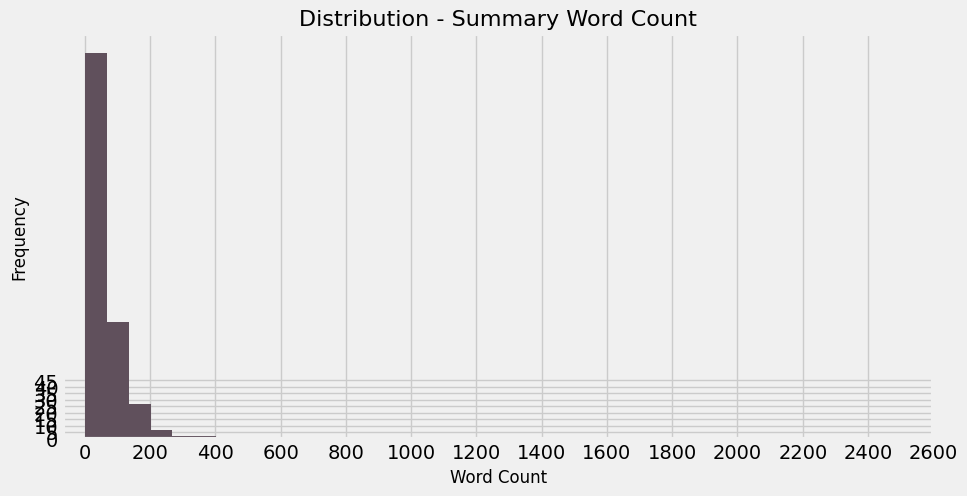

In [17]:
fig = plt.figure(figsize=(10,5))

plt.hist(
    grievances_df['word_count'],
    bins=20,
    color='#60505C'
)

plt.title('Distribution - Summary Word Count', fontsize=16)
plt.ylabel('Frequency', fontsize=12)
plt.xlabel('Word Count', fontsize=12)
plt.yticks(np.arange(0, 50, 5))
plt.xticks(np.arange(0, 2700, 200))


plt.show()

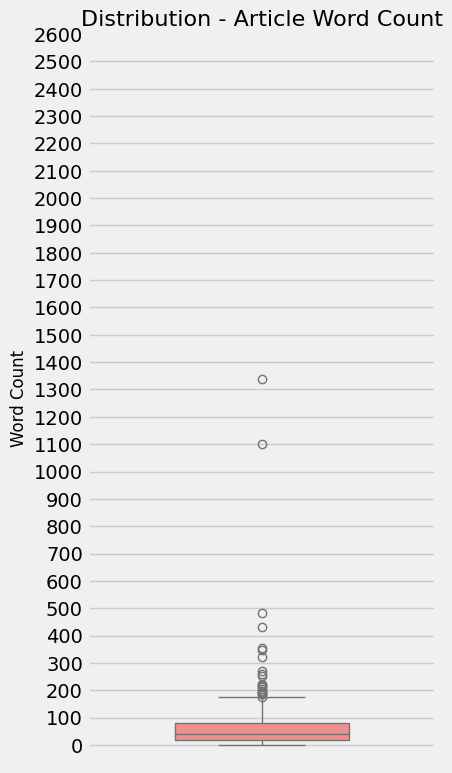

In [18]:
# Plot a boxplot of the word counts
fig = plt.figure(figsize=(4,9))

sns.boxplot(
    grievances_df['word_count'],
    orient='v',
    width=.5,
    color='#ff8080'
)

plt.ylabel("Word Count", fontsize=12)
plt.title('Distribution - Article Word Count', fontsize=16)
plt.yticks(np.arange(0, 2700, 100))


plt.show()

In [19]:
all_words=grievances_df['processed_text'].explode().dropna()

top_20 = pd.DataFrame(
    Counter(all_words).most_common(20),
    columns=['word', 'frequency']
)

top_20



,word,frequency
0,pt,490
1,alleg,301
2,report,295
3,compani,244
4,land,208
5,respond,193
6,palm,190
7,oil,178
8,plantat,169
9,forest,158


/tmp/ipython-input-20-3688338379.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.barplot(
/tmp/ipython-input-20-3688338379.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(


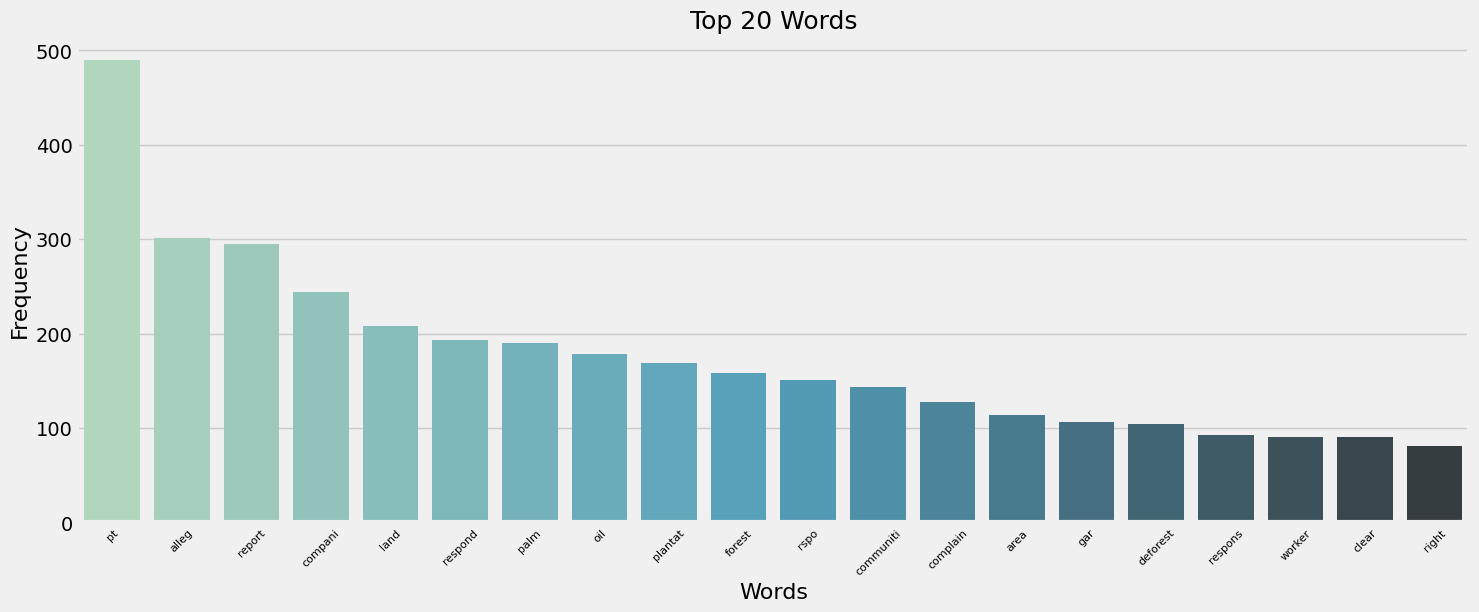

In [20]:
# Plot a bar chart for the top 20 most frequently occuring words
fig = plt.figure(figsize=(16,6))

g = sns.barplot(
    x='word',
    y='frequency',
    data=top_20,
    palette='GnBu_d'
)

g.set_xticklabels(
    g.get_xticklabels(),
    rotation=45,
    fontsize=8
)

plt.yticks(fontsize=14)
plt.xlabel('Words', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.title('Top 20 Words', fontsize=18)


plt.show()

In [21]:
num_unique_words = len(set(all_words))
num_unique_words

2919

In [23]:
texts = grievances_df['processed_text'].dropna()

tfidf_vectorizer = TfidfVectorizer(
    min_df=3,
    max_df=0.85,
    max_features=5000,
    ngram_range=(2,3),
    preprocessor=' '.join
)

tfidf = tfidf_vectorizer.fit_transform(texts)

In [24]:
nmf = NMF(
    n_components=20,
    init='nndsvd'
).fit(tfidf)

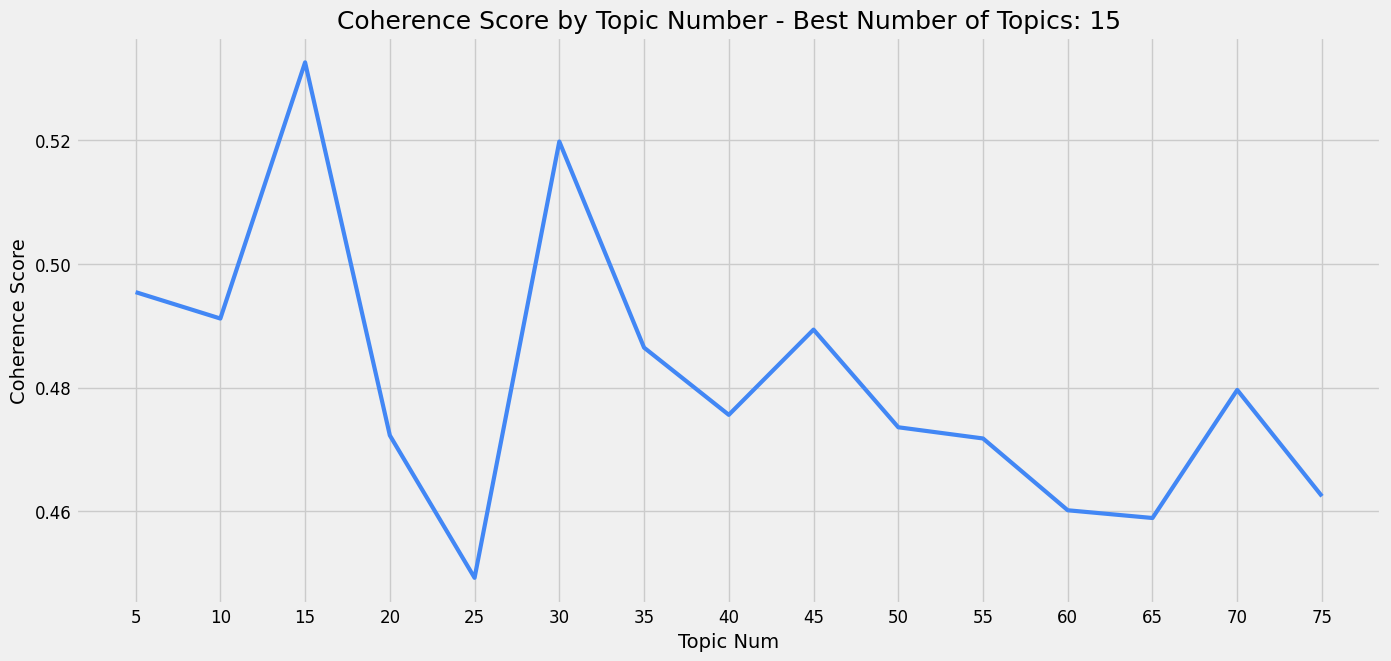

In [25]:
# Use Gensim's NMF to get the best num of topics via coherence score
texts = grievances_df['processed_text'].dropna().tolist()


dictionary = Dictionary(texts)

# Filter out extremes to limit the number of features
dictionary.filter_extremes(
    no_below=3,
    no_above=0.85,
    keep_n=5000
)
# Create the bag-of-words format (list of (token_id, token_count))
corpus = [dictionary.doc2bow(text) for text in texts]

# Create a list of the topic numbers we want to try
topic_nums = list(np.arange(5, 75 + 1, 5))

# Run the nmf model and calculate the coherence score
# for each number of topics
coherence_scores = []

for num in topic_nums:
    nmf = Nmf(
        corpus=corpus,
        num_topics=num,
        id2word=dictionary,
        chunksize=2000,
        passes=5,
        kappa=.1,
        minimum_probability=0.01,
        w_max_iter=300,
        w_stop_condition=0.0001,
        h_max_iter=100,
        h_stop_condition=0.001,
        eval_every=10,
        normalize=True,
        random_state=42
    )

    # Run the coherence model to get the score
    cm = CoherenceModel(
        model=nmf,
        texts=texts,
        dictionary=dictionary,
        coherence='c_v'
    )

    coherence_scores.append(round(cm.get_coherence(), 5))

# Get the number of topics with the highest coherence score
scores = list(zip(topic_nums, coherence_scores))
best_num_topics = sorted(scores, key=itemgetter(1), reverse=True)[0][0]

# Plot the results
fig = plt.figure(figsize=(15, 7))

plt.plot(
    topic_nums,
    coherence_scores,
    linewidth=3,
    color='#4287f5'
)

plt.xlabel("Topic Num", fontsize=14)
plt.ylabel("Coherence Score", fontsize=14)
plt.title('Coherence Score by Topic Number - Best Number of Topics: {}'.format(best_num_topics), fontsize=18)
plt.xticks(np.arange(5, max(topic_nums) + 1, 5), fontsize=12)
plt.yticks(fontsize=12)

plt.show()

In [26]:
# Now use the number of topics with the
# highest coherence score to run the
# sklearn nmf model

texts = grievances_df['processed_text'].dropna()

# Create the tfidf weights
tfidf_vectorizer = TfidfVectorizer(
    min_df=3,
    max_df=0.85,
    max_features=5000,
    ngram_range=(3, 3),
    preprocessor=' '.join
)

tfidf = tfidf_vectorizer.fit_transform(texts)

# Save the feature names for later to create topic summaries
tfidf_fn = tfidf_vectorizer.get_feature_names_out()
# Run the nmf model
nmfmodel = NMF(
    n_components=best_num_topics,
    init='nndsvd',
    max_iter=500,
    l1_ratio=0.0,
    solver='cd',
    alpha_W=0.0,
    tol=1e-4,
    random_state=42
).fit(tfidf)

In [27]:
# Use the top words for each cluster by tfidf weight
# to create 'topics'

# Getting a df with each topic by document
docweights = nmfmodel.transform(tfidf_vectorizer.transform(texts))

n_top_words = 8

topic_df = topic_table(
    nmfmodel,
    tfidf_fn,
    n_top_words
).T

# Cleaning up the top words to create topic summaries
topic_df['topics'] = topic_df.apply(lambda x: [' '.join(x)], axis=1) # Joining each word into a list
topic_df['topics'] = topic_df['topics'].str[0]  # Removing the list brackets
topic_df['topics'] = topic_df['topics'].apply(lambda x: whitespace_tokenizer(x)) # tokenize
topic_df['topics'] = topic_df['topics'].apply(lambda x: unique_words(x))  # Removing duplicate words
topic_df['topics'] = topic_df['topics'].apply(lambda x: [' '.join(x)])  # Joining each word into a list
topic_df['topics'] = topic_df['topics'].str[0]  # Removing the list brackets

topic_df.head()

,0,1,2,3,4,5,6,7,topics
0,rapid respons report,mighti earth rapid,earth rapid respons,respons report report,report report indic,indic ha deforest,report indic ha,ha deforest pt,rapid respons report mighti earth indic ha def...
1,complain alleg respond,alleg respond did,plant oil palm,alleg respond conduct,respond complain alleg,hold sdn bhd,develop oil palm,oil palm plantat,complain alleg respond did plant oil palm cond...
2,oil palm plantat,peputra supra jaya,hendana pt inecda,compani grievanc handl,omnibus law automat,engag compani grievanc,report conduct investig,eof investig involv,oil palm plantat peputra supra jaya hendana pt...
3,palm oil plantat,develop palm oil,conflict local communiti,conflict palm oil,illeg palm oil,hak guna usaha,gar supplier pt,oil palm fruit,palm oil plantat develop conflict local commun...
4,new plant procedur,prior inform consent,high conserv valu,free prior inform,plant procedur npp,rspo principl criteria,oil palm plantat,violat rspo principl,new plant procedur prior inform consent high c...


In [ ]:
topic_df = topic_df['topics'].reset_index()
topic_df.columns = ['topic_num', 'topics']

topic_df

,topic_num,topics
0,0,rapid respons report mighti earth indic ha def...
1,1,complain alleg respond did plant oil palm cond...
2,2,oil palm plantat peputra supra jaya hendana pt...
3,3,palm oil plantat develop conflict local commun...
4,4,new plant procedur prior inform consent high c...
5,5,gar suppli chain report compani alleg respons ...
6,6,nation park bukit sourc ffb tesso number compa...
7,7,mention greenpeac report final countdown eagl ...
8,8,intern monitor detect gar indic mighti earth r...
9,9,alleg deforest pt compani link supplier case r...


In [ ]:
# coherence_model = CoherenceModel(model=nmfmodel, texts=clean_text, dictionary=dictionary, coherence='c_v')
# coherence_score = coherence_model.get_coherence()
# coherence_score

# Visualizations

In [ ]:
model_name = "NMF"

## Create Dataframe with Results

In [ ]:
# Input: sklearn NMF model, TFIDF matrix, original texts
# Output: DataFrame with dominant topic, contribution, keywords, and original text
def format_topics_sentences_nmf(model, tfidf_matrix, texts, feature_names, n_top_words=10):
    # Get document-topic matrix
    doc_topic_matrix = model.transform(tfidf_matrix)

    # Get topic keywords
    topic_keywords = []
    for topic_idx, topic in enumerate(model.components_):
        top_features = [feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]
        topic_keywords.append(", ".join(top_features))

    # Build rows
    rows = []
    for i, topic_dist in enumerate(doc_topic_matrix):
        total_weight = topic_dist.sum()
        topic_percentages = {
            f"Topic_{j}": round((weight / total_weight) * 100, 2)
            for j, weight in enumerate(topic_dist)
        }
        dominant_topic = topic_dist.argmax()
        perc_contribution = round((topic_dist[dominant_topic] / total_weight) * 100, 2)

        row = {
            'Dominant_Topic': dominant_topic,
            'Perc_Contribution': perc_contribution,
            'Topic_Keywords': topic_keywords[dominant_topic],
            'Text': texts[i]
        }
        row.update(topic_percentages)
        rows.append(row)

    #Create Dataframe
    return pd.DataFrame(rows)


In [ ]:
text = grievances_df['summary'].dropna().tolist()

dominant_topic_df = format_topics_sentences_nmf(
    model=nmfmodel,
    tfidf_matrix=tfidf,
    texts=grievances_df['summary'].dropna().tolist(),
    feature_names=tfidf_fn,
    n_top_words=10
).reset_index()

dominant_topic_df

/tmp/ipython-input-29-3384793404.py:18: RuntimeWarning: invalid value encountered in scalar divide
  f"Topic_{j}": round((weight / total_weight) * 100, 2)
/tmp/ipython-input-29-3384793404.py:22: RuntimeWarning: invalid value encountered in scalar divide
  perc_contribution = round((topic_dist[dominant_topic] / total_weight) * 100, 2)


,index,Dominant_Topic,Perc_Contribution,Topic_Keywords,Text,Topic_0,Topic_1,Topic_2,Topic_3,Topic_4,Topic_5,Topic_6,Topic_7,Topic_8,Topic_9,Topic_10,Topic_11,Topic_12,Topic_13,Topic_14
0,0,1,98.50,"complain alleg respond, alleg respond did, pla...",That the Respondent allegedly transferred the ...,0.0,98.50,1.50,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,1,100.00,"complain alleg respond, alleg respond did, pla...",The Complainant alleges that the Respondent ha...,0.0,100.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,1,89.94,"complain alleg respond, alleg respond did, pla...",1.The Complainant alleges that the Respondent ...,0.0,89.94,2.74,0.0,7.31,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,12,100.00,"palm oil compani, publish report titl, ran pub...",The Respondent's Corporate Social Responsibili...,0.0,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0
4,4,4,61.67,"new plant procedur, prior inform consent, high...",The Complainant alleges that the Respondent br...,0.0,38.33,0.00,0.0,61.67,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
382,382,0,NaN,"rapid respons report, mighti earth rapid, eart...",Alleged community rights violations and land c...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
383,383,0,NaN,"rapid respons report, mighti earth rapid, eart...","i. PT Rimba Harapan Saksti (RHS), PT Sarana Ti...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
384,384,0,NaN,"rapid respons report, mighti earth rapid, eart...",Alleged construction of canal to prepare for d...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
385,385,11,100.00,"clearanc impact biodivers, forest clearanc imp...",Alleged clearance of potential High Carbon Sto...,0.0,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0


## Data Exploration

In [ ]:
dominant_topic_df[dominant_topic_df['Dominant_Topic'] == 10]

,index,Dominant_Topic,Perc_Contribution,Topic_Keywords,Text,Topic_0,Topic_1,Topic_2,Topic_3,Topic_4,Topic_5,Topic_6,Topic_7,Topic_8,Topic_9,Topic_10,Topic_11,Topic_12,Topic_13,Topic_14
346,346,10,98.66,"non compli palm, compli palm product, alleg en...",Non-compliant palm products from YP Plantation...,0.0,1.29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.05,98.66,0.0,0.00,0.0,0.0
355,355,10,96.71,"non compli palm, compli palm product, alleg en...",Non-compliant palm products from PT Indo Alam ...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,96.71,0.0,3.29,0.0,0.0
357,357,10,100.00,"non compli palm, compli palm product, alleg en...",Non-compliant palm products from Amanah Saham ...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,100.00,0.0,0.00,0.0,0.0
370,370,10,100.00,"non compli palm, compli palm product, alleg en...",Non-compliant palm products from Alas Kusuma a...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,100.00,0.0,0.00,0.0,0.0
371,371,10,100.00,"non compli palm, compli palm product, alleg en...",Non-compliant palm products allegedly enter Wi...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,100.00,0.0,0.00,0.0,0.0


## Avg Dominant Topic Contribution

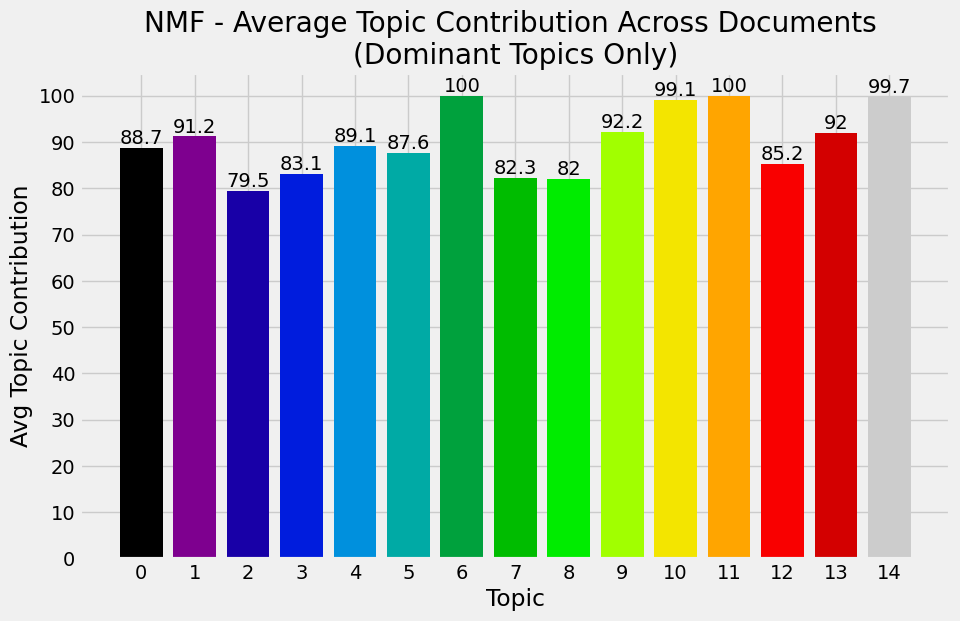

In [ ]:
# Prepare data
topic_avg_df = dominant_topic_df.groupby('Dominant_Topic')['Perc_Contribution'].mean().reset_index()
indexes = topic_avg_df['Dominant_Topic']
values = topic_avg_df['Perc_Contribution'].round(1)

colors = plt.cm.nipy_spectral(np.linspace(0, 1, len(indexes)))

# Plot
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(indexes, values, color=colors[:len(indexes)])
ax.bar_label(bars)

# Labels and title
ax.set_title(f'{model_name} - Average Topic Contribution Across Documents \n(Dominant Topics Only)')
ax.set_xlabel('Topic')
ax.set_ylabel('Avg Topic Contribution')
plt.xticks(indexes)
plt.yticks(range(0,101,10))
plt.show()

## Topic Frequency

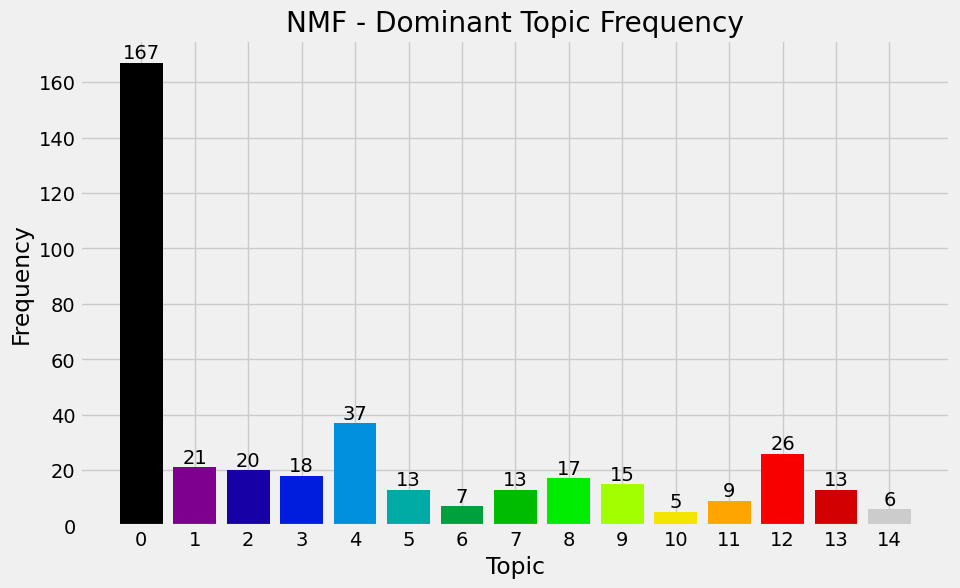

In [ ]:
# Prepare data
topics_df = dominant_topic_df.groupby(['Dominant_Topic'])['index'].count().reset_index()
indexes = topics_df['Dominant_Topic']
values = topics_df['index']

colors = plt.cm.nipy_spectral(np.linspace(0, 1, len(indexes)))

# Plot
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(indexes, values, color=colors[:len(indexes)])
ax.bar_label(bars)

# Labels and title
ax.set_title(f'{model_name} - Dominant Topic Frequency')
ax.set_xlabel('Topic')
ax.set_ylabel('Frequency')
plt.xticks(indexes)
plt.show()

## Topic Distribution per Doc

In [ ]:
def topic_dist_doc(df, n_topics, doc_num):
    import matplotlib.pyplot as plt

    topics = []
    values = []

    doc_row = df[df['index'] == doc_num]

    for i in range(n_topics):
        col_name = f"Topic_{i}"
        val = doc_row[col_name].values[0] if not doc_row.empty and pd.notnull(doc_row[col_name].values[0]) else 0.0
        topics.append(col_name)
        values.append(float(val))  # Ensure it's a float

    # Plotting
    plt.figure(figsize=(10, 6))
    colors = plt.cm.nipy_spectral(np.linspace(0, 1, len(indexes)))
    plt.bar(topics, values, color=colors[:len(indexes)])

    plt.xlabel('Topics')
    plt.ylabel('Topic Contribution')
    plt.title(f'{model_name} - Topic Distribution for Document {doc_num}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


In [ ]:
topic_dist_doc(dominant_topic_df, n_topics, 47)

NameError: name 'n_topics' is not defined

## Wordclouds

/tmp/ipython-input-53-2351247378.py:29: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout(rect=[9, 0, 1, 0.95])


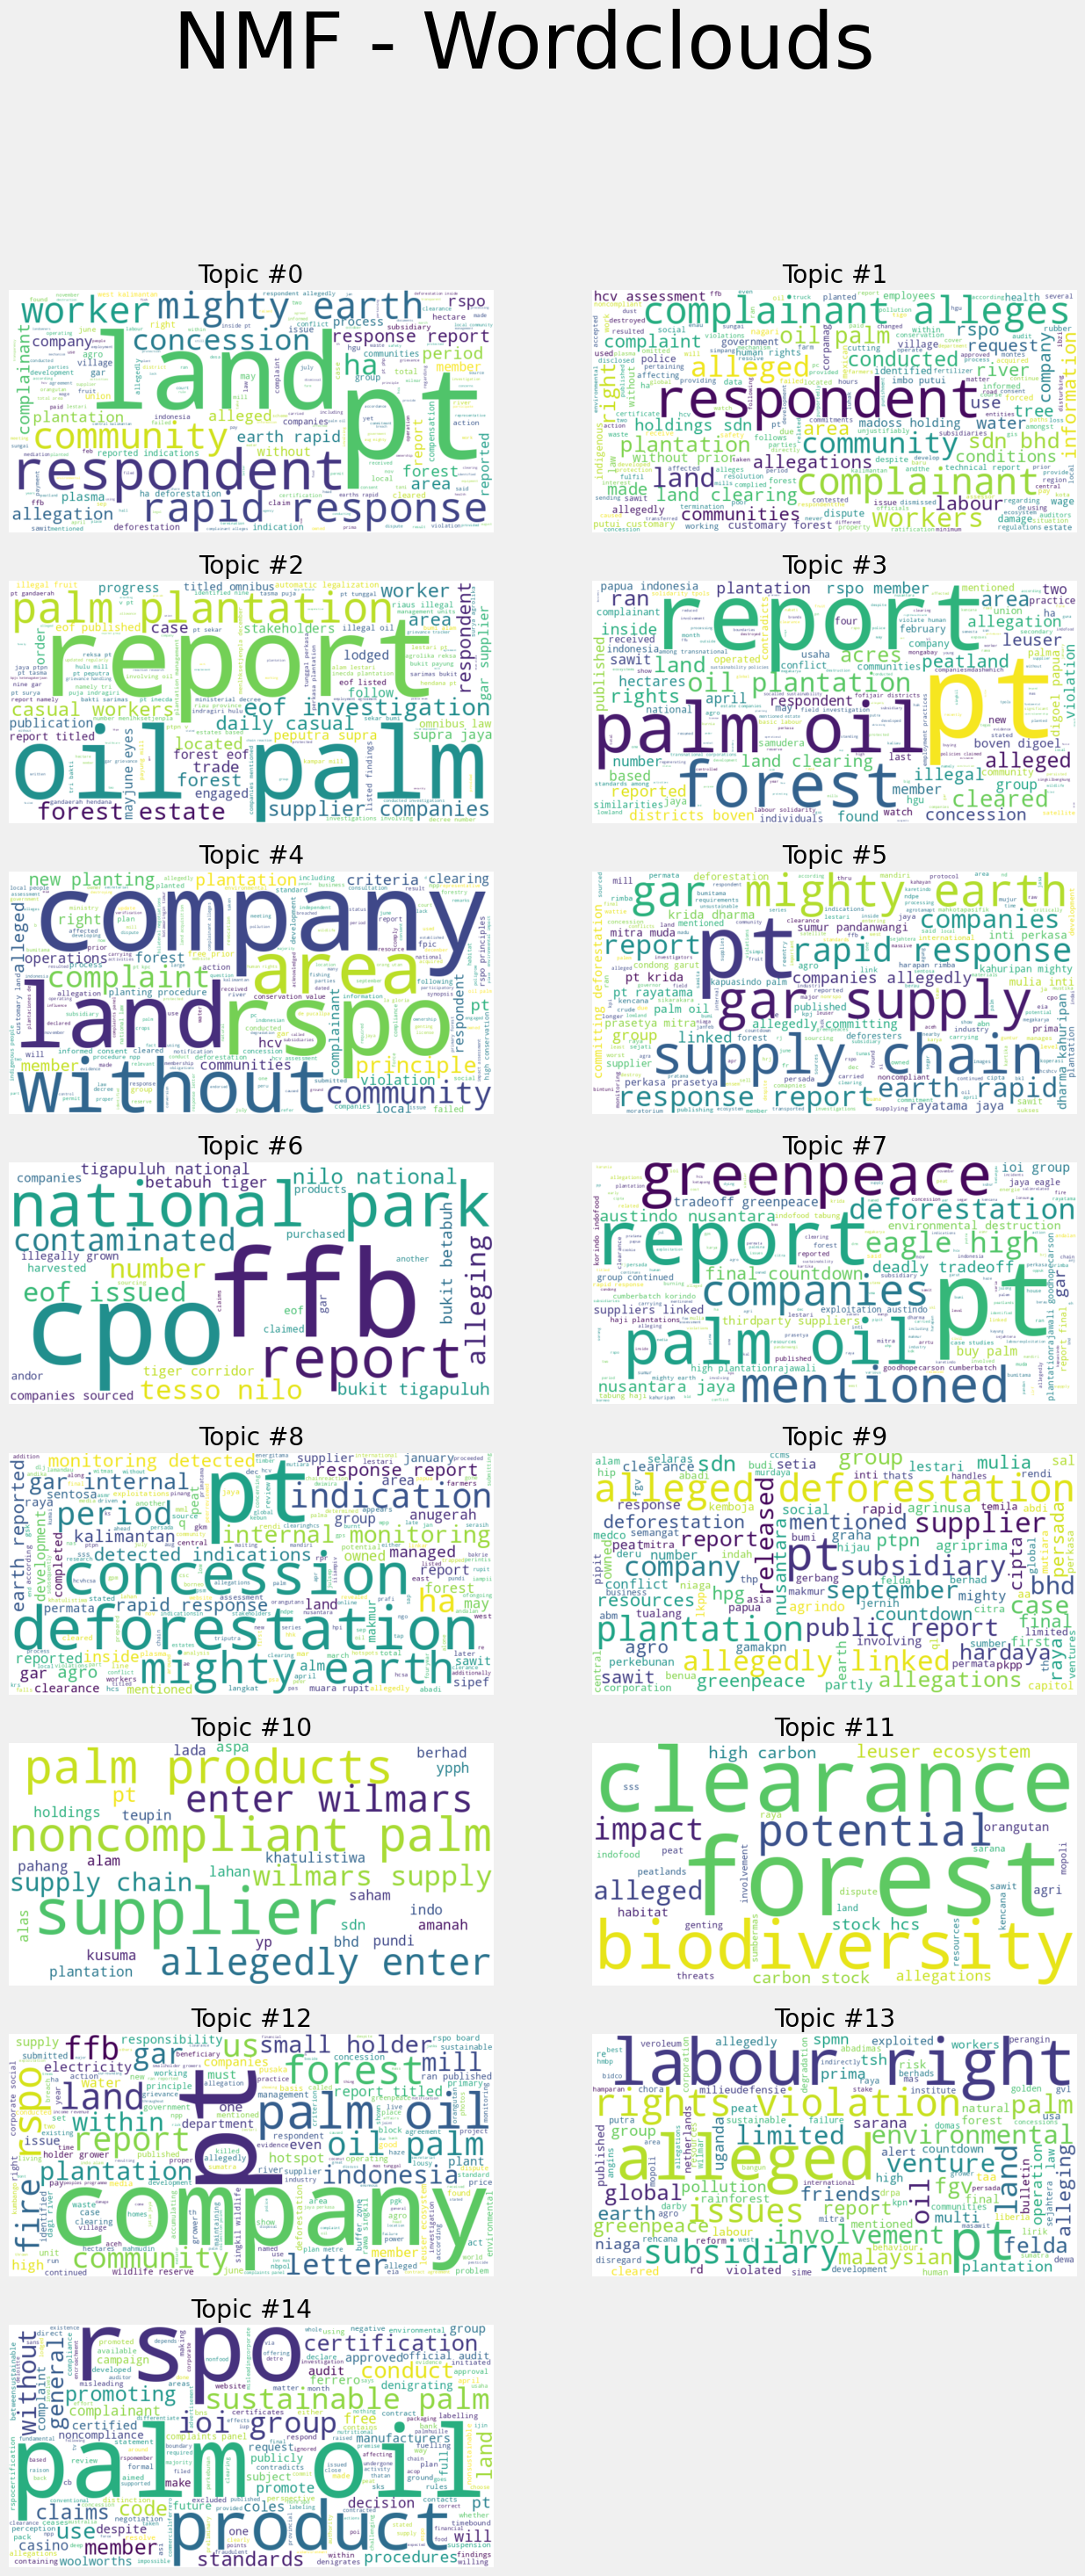

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re

# Input: Receives dataframe containing all rows with classification, table title, and number of topics
# Output: Displays n word clouds
def display_wordcloud(df, title, n_topics):

  n_cols = 2
  n_rows = int(np.ceil(n_topics / n_cols))
  fig = plt.figure(figsize=(14, 4 * n_rows))

  for topic in range(n_topics):
    topic_df = dominant_topic_df[dominant_topic_df['Dominant_Topic'] == topic]
    text = ' '.join(topic_df['Text'].astype(str).tolist()) # Joining the words of each text of each row into a list separated by ' '
    text = re.sub(r'[^A-Za-z\s]', '', text) # Substituting/deleting anything that IS NOT a letter Aa-Zz with ''
    text = text.lower()
    #en_stop = set(stopwords.words('english') + stopwords_extra)
    #text = ' '.join(word for word in text.split() if word not in en_stop)

    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    ax = fig.add_subplot(n_rows, n_cols, topic + 1)
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.set_title(f"Topic #{topic}")
    ax.axis("off")

  fig.suptitle(title, fontsize=64)
  plt.tight_layout(rect=[9, 0, 1, 0.95])
  plt.show()


n_topics = dominant_topic_df['Dominant_Topic'].nunique() # Get topics from dataframe

display_wordcloud(df=dominant_topic_df, title=f'{model_name} - Wordclouds', n_topics=n_topics)

## Overall Dominant Topic % share

Text(0, 0.5, 'Number of Documents')

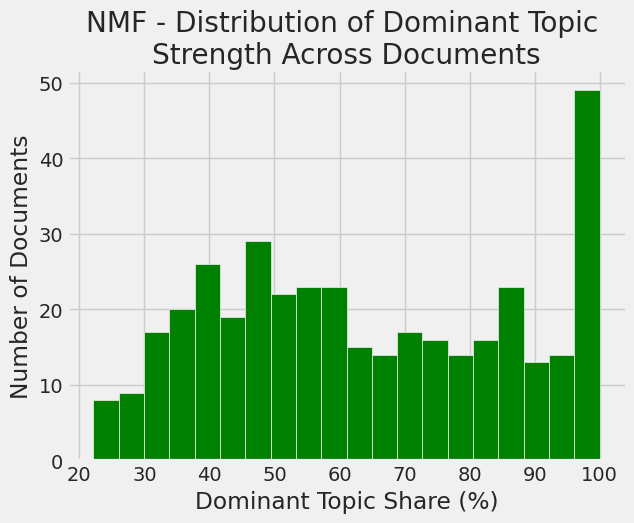

In [ ]:
# Displays every doc's dominant topic share as a percentage compared to its other non-dominant topics
# Basically how much weight the dominant topic have throughout each of the documents
dominant_topic_df['Perc_Contribution'].plot(kind='hist', bins=20, title='Perc_Contribution', color='green')
plt.gca().spines[['top', 'right',]].set_visible(False)

plt.title(f"{model_name} - Distribution of Dominant Topic \nStrength Across Documents")
plt.xlabel("Dominant Topic Share (%)")
plt.ylabel("Number of Documents")